# Importing necessary libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Data Loading and Inspection



> Load the Titanic dataset and display basic information to understand the structure and data types, as well as summary statistics to get an overview of the data.



In [4]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

In [5]:
# Display the first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Display summary information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# Show statistical summary
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning



> Handle missing values by filling or dropping columns. The median fills in missing ages, the mode fills in missing embarkations, and columns with too many missing values are removed.



In [8]:
# Check for missing values
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
# Fill missing 'age' with the median value
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [10]:
# Fill missing 'embarked' with the mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [11]:
# Drop the 'deck' column due to many missing values
titanic.drop(columns=['deck'], inplace=True)

In [12]:
# Drop rows with missing 'embark_town'
titanic.dropna(subset=['embark_town'], inplace=True)

In [13]:
# Verify data cleaning
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


# Exploratory Data Analysis (EDA)

Distribution of passenger ages

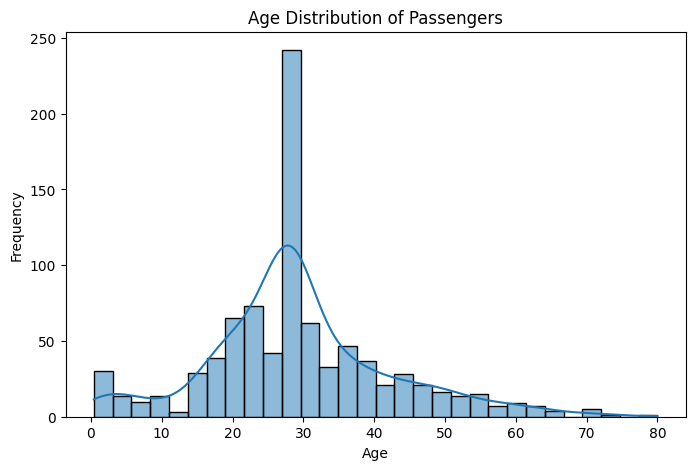

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



> Visualize the age distribution of passengers to understand the age range and identify common age groups using a histogram.



Survival count by gender

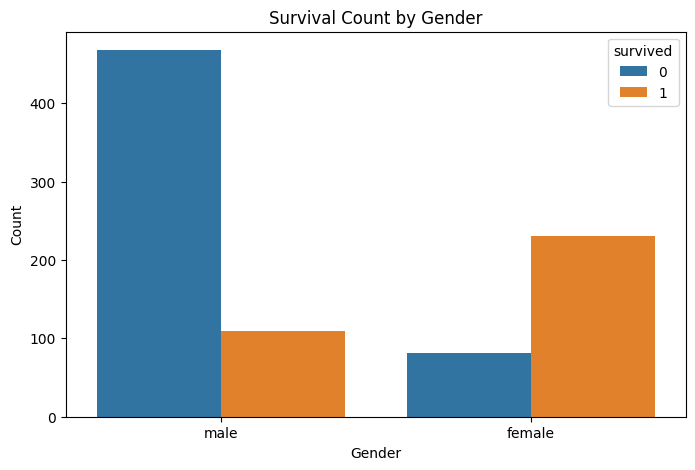

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



> A count plot shows the survival distribution based on gender, indicating which gender had a higher survival rate.



Correlation matrix heatmap

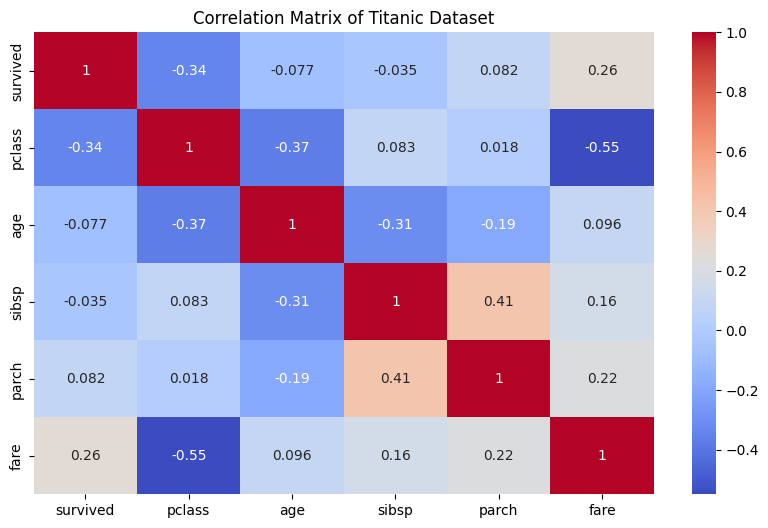

In [18]:
# Select only numerical columns for the correlation matrix
numerical_titanic = titanic.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_titanic.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()



> The heatmap visualizes correlations between numerical features, helping to identify relationships that may influence survival.



Survival by class

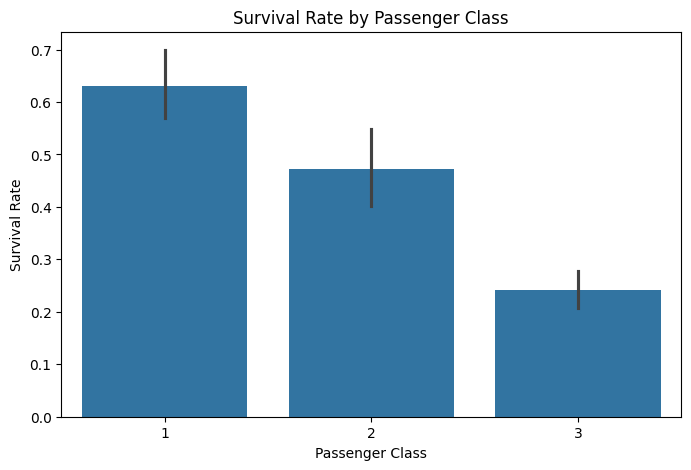

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()



> A bar plot shows how survival rates vary by passenger class, highlighting the impact of socio-economic status.



Survival based on fare

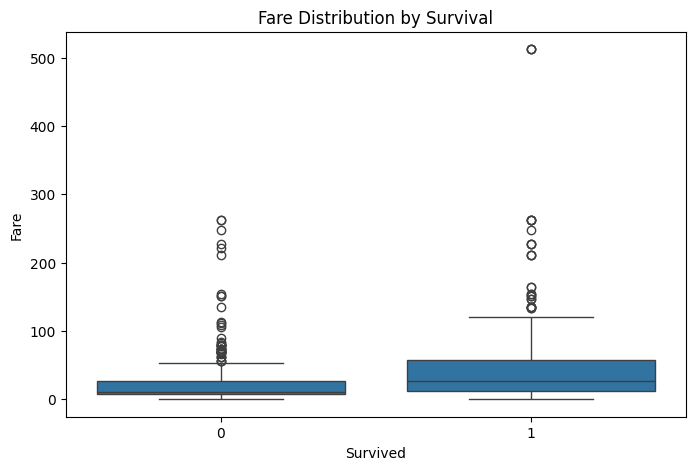

In [20]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()




> A box plot illustrates how fares correlate with survival, indicating whether higher fare passengers had better survival chances.



# Feature Engineering



> New features family_size (number of siblings/spouses and parents/children) and is_alone (binary indicator if the passenger was alone) are added to provide more insights.



In [21]:
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

In [25]:
# Create a new feature: Is alone
titanic['is_alone'] = np.where(titanic['family_size'] > 0, 0, 1)

In [26]:
# Display new features
print(titanic[['family_size', 'is_alone']].head())

   family_size  is_alone
0            1         0
1            1         0
2            0         1
3            1         0
4            0         1


# Additional Data Visualizations

Survival rate by family size

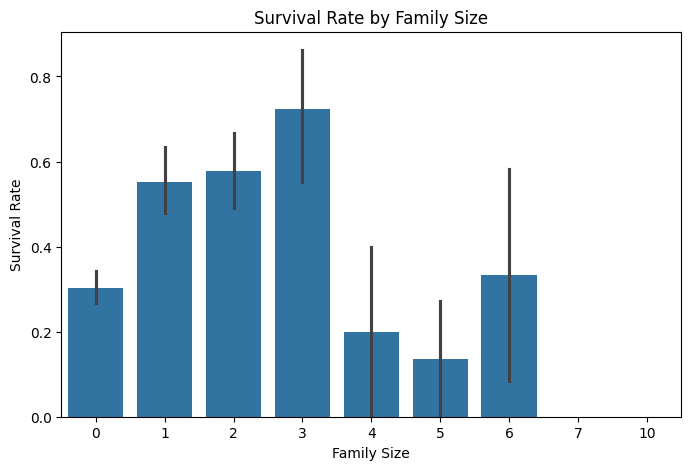

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()



> A bar plot shows how the number of family members affects the likelihood of survival.



Distribution of passengers by embark town

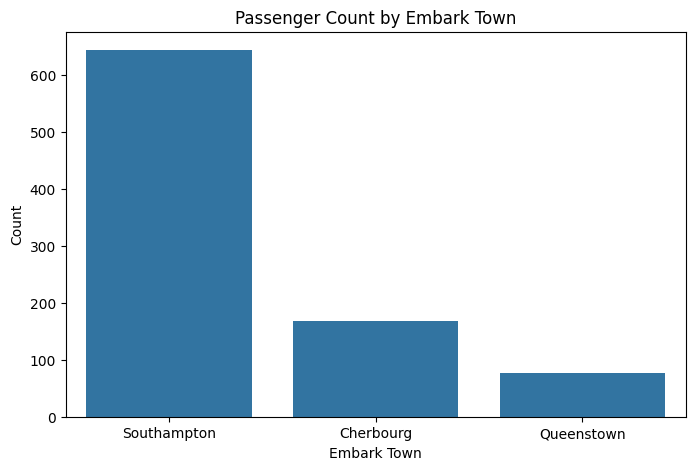

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='embark_town', data=titanic)
plt.title('Passenger Count by Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.show()



> A count plot to see where most passengers boarded, helping to understand the demographics of the Titanic passengers.



Survival rate by embark town

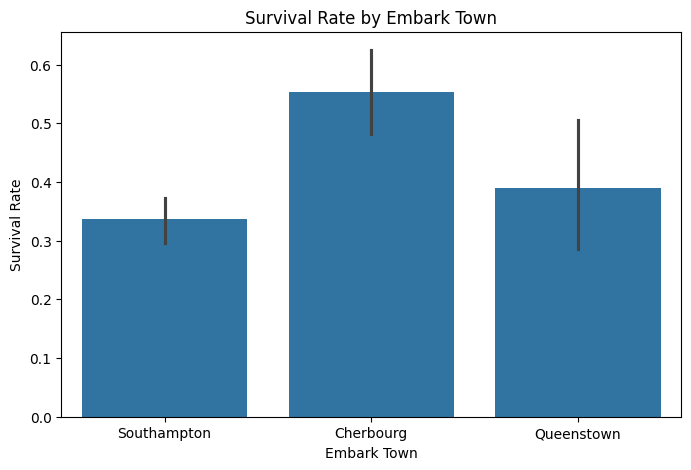

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='embark_town', y='survived', data=titanic)
plt.title('Survival Rate by Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Survival Rate')
plt.show()



> A bar plot shows survival rates by embarkation town, suggesting geographical differences in survival chances.



Age distribution by passenger class

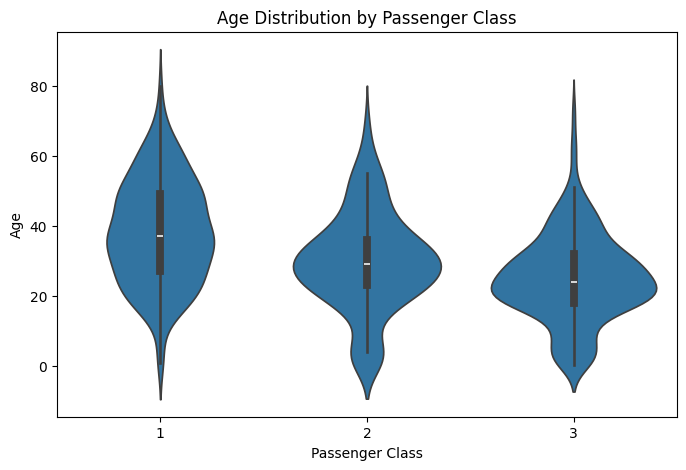

In [30]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='pclass', y='age', data=titanic)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()



> A violin plot shows the distribution of ages within each passenger class, indicating differences in age demographics among classes.



Fare distribution by passenger class

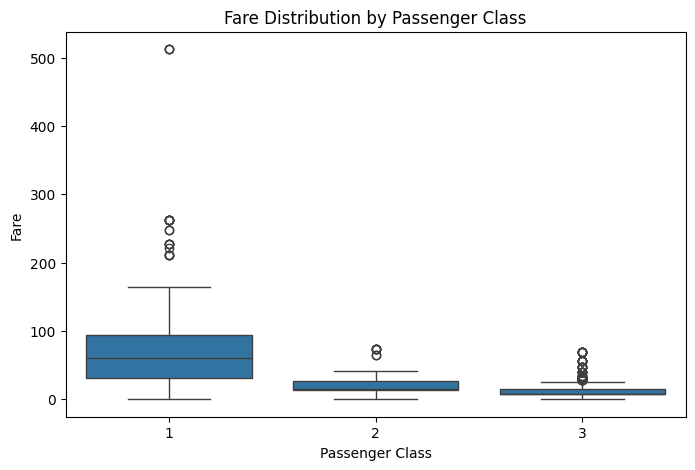

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()



> This box plot shows how fares varied among passenger classes, indicating economic differences in ticket pricing.



# Summary of Analysis



*   **Age Distribution**: Most passengers were young adults, with a significant number of children and elderly individuals.

*   **Gender and Survival**: Women had a higher survival rate compared to men, reflecting the "women and children first" policy.

*   **Passenger Class and Survival**: First-class passengers had higher survival rates than those in lower classes, showing a class-based disparity in survival chances.

*   **Fare Influence**: Higher fare payments correlated with better survival odds, likely due to better access to lifeboats.
*   List item


*   **Family Size and Survival**: Moderate family sizes had higher survival rates; passengers traveling alone had lower survival chances.


*   **Embarkation Town**: Passengers who embarked at certain towns had varying survival rates, potentially reflecting different socioeconomic backgrounds.

